# Two-Body decay generator

In [7]:
import numpy as np
import pandas as pd
import math

## Let's create 100000 rows
ran1 = np.random.default_rng().uniform(low=0.,high=1.,size=[100000,1])
ran2 = np.random.default_rng().uniform(low=0.,high=1.,size=[100000,1])

## Creating the dataframes
df_ran1 = pd.DataFrame(ran1, columns=["ran1"])
df_ran2 = pd.DataFrame(ran2, columns=["ran2"])

df = pd.concat([df_ran1, df_ran2], axis=1, join='outer')

df['theta'] = np.arccos(1.-2.*df['ran1'])
df['phi'] = 2.*math.pi*df['ran2']

a1 = 33548.038
a2 = 939.565
Ed = 0.2

Ex = a1+a2+Ed
p1 = math.sqrt(abs((Ex*Ex - (a1+a2)*(a1+a2))*(Ex*Ex - (a1-a2)*(a1-a2))))/(2.*Ex);

df['pfx'] = p1*np.sin(df['theta'])*np.cos(df['phi'])
df['pfy'] = p1*np.sin(df['theta'])*np.sin(df['phi'])
df['pfz'] = p1*np.cos(df['theta'])
df['Ef'] = np.sqrt(a1*a1+p1*p1)

df['pnx'] = -df['pfx']
df['pny'] = -df['pfy']
df['pnz'] = -df['pfz']
df['En'] = np.sqrt(a2*a2+p1*p1)

#ZBOOST
beta = 0.4794
gamma = 1./math.sqrt(1.-beta*beta)
c = 0.299792 #m/ns

df['pnz_b'] = gamma*(df['pnz']+beta*df['En'])
df['En_b'] = gamma*(beta*df['pnz']+df['En'])

df['pfz_b'] = gamma*(df['pfz']+beta*df['Ef'])
df['Ef_b'] = gamma*(beta*df['pfz']+df['Ef'])

df['Erel'] = np.sqrt(a1*a1 + a2*a2 + 2*df['Ef']*df['En'] - 2.*(df['pfx']*df['pnx']+df['pfy']*df['pny']+df['pfz']*df['pnz'])) - a1 - a2
df['Erel_b'] = np.sqrt(a1*a1 + a2*a2 + 2*df['Ef_b']*df['En_b'] - 2.*(df['pfx']*df['pnx']+df['pfy']*df['pny']+df['pfz_b']*df['pnz_b'])) - a1 - a2

df['Bf'] = np.sqrt(1.-(a1*a1/(df['Ef_b']*df['Ef_b'])))
df['Bn'] = np.sqrt(1.-(a2*a2/(df['En_b']*df['En_b'])))

#position/time at Z=8m
df['nt'] = 8.*np.sqrt(1.+(a2*a2)/(df['pnz_b']*df['pnz_b']))/c
#df['Bnz'] = 1./np.sqrt(1.+(a2*a2)/(df['pnz_b']*df['pnz_b']))
df['nx'] = df['pnx']*df['nt']*c/np.sqrt(1.+(a2*a2)/(df['pnx']*df['pnx']))/abs(df['pnx'])
df['ny'] = df['pny']*df['nt']*c/np.sqrt(1.+(a2*a2)/(df['pny']*df['pny']))/abs(df['pny'])

df 

,ran1,ran2,theta,phi,pfx,pfy,pfz,Ef,pnx,pny,...,En_b,pfz_b,Ef_b,Erel,Erel_b,Bf,Bn,nt,nx,ny
0,0.709134,0.924709,2.002334,5.810119,15.460859,-7.913319,-7.997824,33548.043449,-15.460859,7.913319,...,1075.202207,18316.998716,38222.815141,0.2,0.2,0.479217,0.486196,54.908730,-0.270838,0.138637
1,0.678353,0.693696,1.935536,4.358618,-6.188567,-16.757204,-6.820686,33548.043449,6.188567,16.757204,...,1074.559178,18318.340036,38223.458170,0.2,0.2,0.479244,0.485255,55.016711,0.108635,0.294117
2,0.019073,0.329010,0.277098,2.067234,-2.491465,4.599469,18.391886,33548.043449,2.491465,-4.599469,...,1060.786440,18347.069152,38237.230908,0.2,0.2,0.479822,0.464210,57.487611,0.045700,-0.084366
3,0.348435,0.837767,1.262820,5.263845,9.546812,-15.520497,5.796252,33548.043449,-9.546812,15.520497,...,1067.666990,18332.716732,38230.350357,0.2,0.2,0.479533,0.474942,56.214242,-0.171228,0.278347
4,0.276119,0.865775,1.106534,5.439824,11.368986,-12.769713,8.561809,33548.043449,-11.368986,12.769713,...,1066.156264,18335.868017,38231.861083,0.2,0.2,0.479597,0.472625,56.486927,-0.204895,0.230135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.661167,0.626647,1.898989,3.937338,-12.666028,-12.930889,-6.163426,33548.043449,12.666028,12.930889,...,1074.200140,18319.088968,38223.817207,0.2,0.2,0.479259,0.484728,55.077273,0.222570,0.227223
99996,0.542232,0.389157,1.655361,2.445148,-14.616063,12.222368,-1.615058,33548.043449,14.616063,-12.222368,...,1071.715527,18324.271724,38226.301820,0.2,0.2,0.479363,0.481051,55.501770,0.258808,-0.216431
99997,0.922089,0.289749,2.575825,1.820548,-2.533482,9.932219,-16.141762,33548.043449,2.533482,-9.932219,...,1079.650952,18307.718896,38218.366395,0.2,0.2,0.479029,0.492612,54.178346,0.043796,-0.171688
99998,0.458160,0.952663,1.487018,5.985758,18.217627,-5.584068,1.600077,33548.043449,-18.217627,5.584068,...,1069.959212,18327.935292,38228.058135,0.2,0.2,0.479437,0.478419,55.807632,-0.324337,0.099433


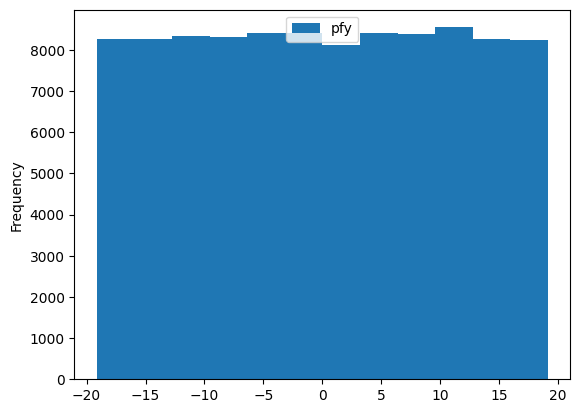

In [8]:
ax = df.plot.hist(column=['pfy'],bins=12)

<Figure size 640x480 with 0 Axes>

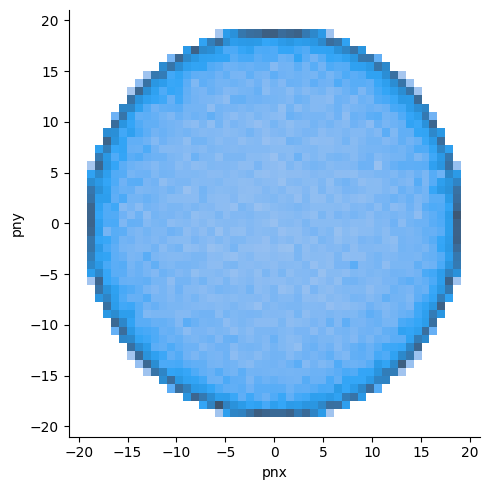

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
sns.displot(x="pnx", y="pny", data=df)
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

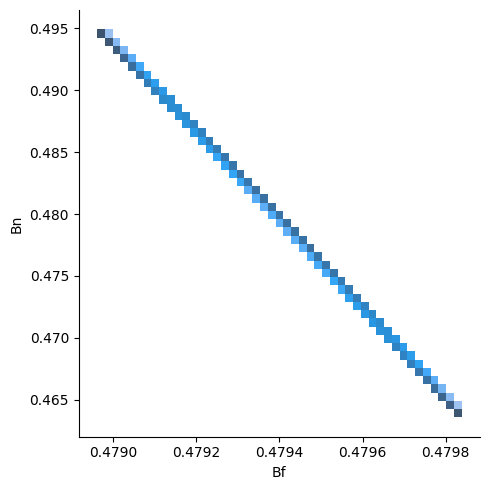

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
sns.displot(x="Bf", y="Bn", data=df)
plt.tight_layout()

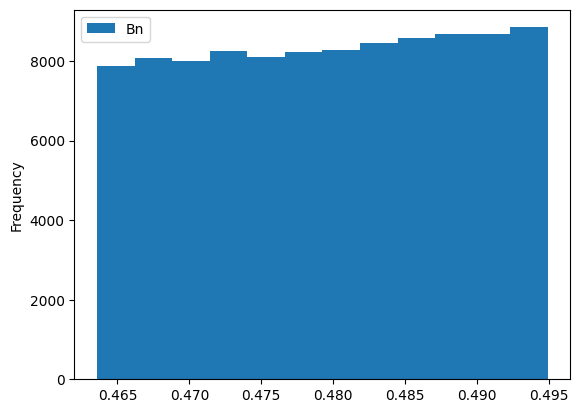

In [11]:
ax = df.plot.hist(column=['Bn'],bins=12)

<Figure size 640x480 with 0 Axes>

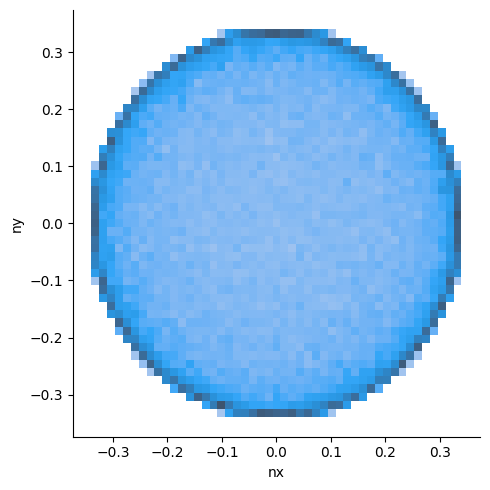

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
sns.displot(x="nx", y="ny", data=df)
plt.tight_layout()

In [13]:
#sub dataframe taking into geometrical acceptance
df_acc = df[abs(df['nx']) <= 1.0]
df_acc = df_acc[abs(df_acc['ny']) <= 1.0]

<Figure size 640x480 with 0 Axes>

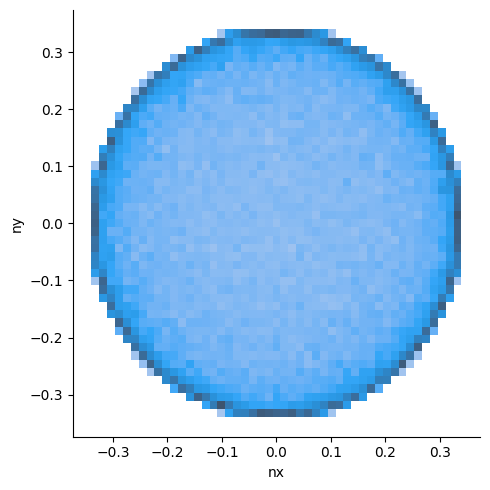

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
sns.displot(x="nx", y="ny", data=df_acc)
plt.tight_layout()

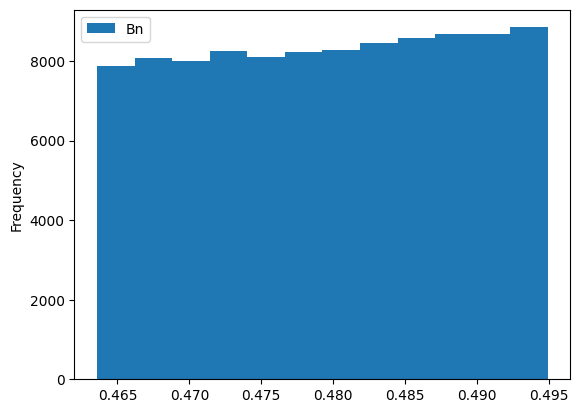

In [15]:
ax = df_acc.plot.hist(column=['Bn'],bins=12)

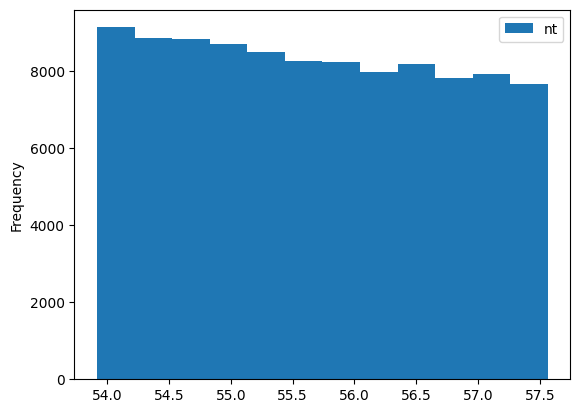

In [16]:
ax = df_acc.plot.hist(column=['nt'],bins=12)

<Figure size 640x480 with 0 Axes>

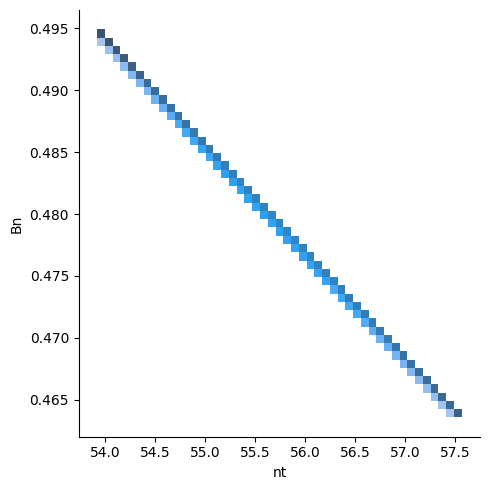

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
sns.displot(x="nt", y="Bn", data=df_acc)
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

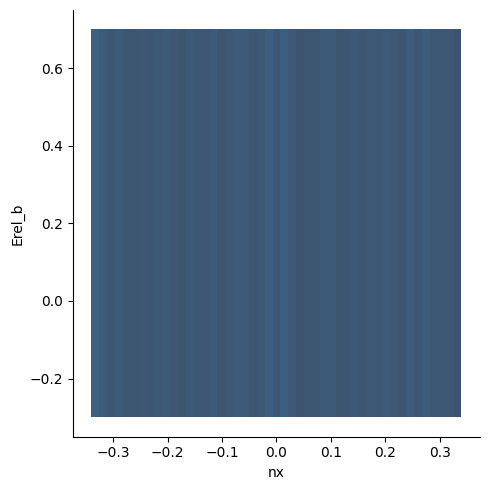

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
sns.displot(x="nx", y="Erel_b", data=df_acc)
plt.tight_layout()